In [10]:
import pandas as pd
from pathlib import Path

In [20]:
root_dir = Path.cwd().parent
filename = root_dir / "network_usage_minio_large.csv"
time_column = "t_parsed"
network_usage_column = "cumulative_parsed"
hostnames = ["136.231.7.16"]
# hostname = "s3-r-w.eu-central-1.amazonaws.com"
# hostnames = ["s3-w.eu-central-1.amazonaws.com", "s3-r-w.eu-central-1.amazonaws.com"]

In [21]:
df = pd.read_csv(filename)
df

,Unnamed: 0,#,host/name,direction,2s,10s,40s,cumulative,t,cumulative_parsed,t_parsed
0,0,1.0,172.30.74.51,=>,59.3Kb,59.3Kb,59.3Kb,14.8KB,2023-12-07-12-43-51,14800,2023-12-07 12:43:51
1,1,NaN,136.231.7.16,<=,10.5Mb,10.5Mb,10.5Mb,2.64MB,2023-12-07-12-43-51,2640000,2023-12-07 12:43:51
2,2,2.0,172.30.74.51,=>,792b,792b,792b,198B,2023-12-07-12-43-51,198,2023-12-07 12:43:51
3,3,NaN,172.30.64.1,<=,2.72Kb,2.72Kb,2.72Kb,696B,2023-12-07-12-43-51,696,2023-12-07 12:43:51
4,4,3.0,239.255.255.250,=>,0b,0b,0b,0B,2023-12-07-12-43-51,0,2023-12-07 12:43:51
...,...,...,...,...,...,...,...,...,...,...,...
2731,2731,NaN,172.30.64.1,<=,620b,620b,620b,155B,2023-12-07-12-46-20,155,2023-12-07 12:46:20
2732,2732,1.0,172.30.74.51,=>,396b,396b,396b,99B,2023-12-07-12-55-52,99,2023-12-07 12:55:52
2733,2733,NaN,l03236.mshome.net,<=,2.71Kb,2.71Kb,2.71Kb,693B,2023-12-07-12-55-52,693,2023-12-07 12:55:52
2734,2734,2.0,mdns.mcast.net,=>,0b,0b,0b,0B,2023-12-07-12-55-52,0,2023-12-07 12:55:52


In [22]:
df_ld = df[df["cumulative_parsed"] > 10000]
df_ld = df_ld[df_ld["direction"] == "<="]
df_ld

,Unnamed: 0,#,host/name,direction,2s,10s,40s,cumulative,t,cumulative_parsed,t_parsed
1,1,NaN,136.231.7.16,<=,10.5Mb,10.5Mb,10.5Mb,2.64MB,2023-12-07-12-43-51,2640000,2023-12-07 12:43:51
9,9,NaN,136.231.7.16,<=,22.7Mb,22.7Mb,22.7Mb,5.67MB,2023-12-07-12-39-56,5670000,2023-12-07 12:39:56
15,15,NaN,136.231.7.16,<=,5.48Mb,5.48Mb,5.48Mb,1.37MB,2023-12-07-12-52-37,1370000,2023-12-07 12:52:37
21,21,NaN,136.231.7.16,<=,24.7Mb,24.7Mb,24.7Mb,6.18MB,2023-12-07-12-45-41,6180000,2023-12-07 12:45:41
31,31,NaN,136.231.7.16,<=,7.70Mb,7.70Mb,7.70Mb,1.92MB,2023-12-07-12-41-25,1920000,2023-12-07 12:41:25
...,...,...,...,...,...,...,...,...,...,...,...
2697,2697,NaN,136.231.7.16,<=,20.8Mb,20.8Mb,20.8Mb,5.21MB,2023-12-07-12-47-26,5210000,2023-12-07 12:47:26
2711,2711,NaN,136.231.7.16,<=,1.81Mb,1.81Mb,1.81Mb,465KB,2023-12-07-12-56-49,465000,2023-12-07 12:56:49
2715,2715,NaN,136.231.7.16,<=,33.8Mb,33.8Mb,33.8Mb,8.45MB,2023-12-07-12-40-16,8450000,2023-12-07 12:40:16
2721,2721,NaN,136.231.7.16,<=,25.8Mb,25.8Mb,25.8Mb,6.44MB,2023-12-07-12-47-28,6440000,2023-12-07 12:47:28


In [23]:
import numpy as np
np.unique(df_ld["host/name"])  # 13. is microsoft (vscode)

array(['136.231.7.16'], dtype=object)

In [24]:
df = pd.read_csv(filename)
df[time_column] = pd.to_datetime(df[time_column])
df = df.loc[df["direction"] == "<="]
df = df.loc[(df["host/name"] == hostnames[0])]#] | (df["host/name"] == hostnames[1])]
df

,Unnamed: 0,#,host/name,direction,2s,10s,40s,cumulative,t,cumulative_parsed,t_parsed
1,1,NaN,136.231.7.16,<=,10.5Mb,10.5Mb,10.5Mb,2.64MB,2023-12-07-12-43-51,2640000,2023-12-07 12:43:51
9,9,NaN,136.231.7.16,<=,22.7Mb,22.7Mb,22.7Mb,5.67MB,2023-12-07-12-39-56,5670000,2023-12-07 12:39:56
15,15,NaN,136.231.7.16,<=,5.48Mb,5.48Mb,5.48Mb,1.37MB,2023-12-07-12-52-37,1370000,2023-12-07 12:52:37
21,21,NaN,136.231.7.16,<=,24.7Mb,24.7Mb,24.7Mb,6.18MB,2023-12-07-12-45-41,6180000,2023-12-07 12:45:41
29,29,NaN,136.231.7.16,<=,672b,672b,672b,168B,2023-12-07-12-56-10,168,2023-12-07 12:56:10
...,...,...,...,...,...,...,...,...,...,...,...
2697,2697,NaN,136.231.7.16,<=,20.8Mb,20.8Mb,20.8Mb,5.21MB,2023-12-07-12-47-26,5210000,2023-12-07 12:47:26
2711,2711,NaN,136.231.7.16,<=,1.81Mb,1.81Mb,1.81Mb,465KB,2023-12-07-12-56-49,465000,2023-12-07 12:56:49
2715,2715,NaN,136.231.7.16,<=,33.8Mb,33.8Mb,33.8Mb,8.45MB,2023-12-07-12-40-16,8450000,2023-12-07 12:40:16
2721,2721,NaN,136.231.7.16,<=,25.8Mb,25.8Mb,25.8Mb,6.44MB,2023-12-07-12-47-28,6440000,2023-12-07 12:47:28


In [25]:
df = df.groupby(['t_parsed']).agg({'cumulative_parsed': 'sum'})
df['cumulative_parsed'] = df['cumulative_parsed'] / 1e6  # to MB
df

,cumulative_parsed
t_parsed,
2023-12-07 12:37:52,0.00006
2023-12-07 12:37:57,0.01850
2023-12-07 12:38:00,1.63000
2023-12-07 12:38:03,5.73000
2023-12-07 12:38:06,6.23000
...,...
2023-12-07 12:59:58,13.30000
2023-12-07 13:00:01,12.40000
2023-12-07 13:00:03,7.20000


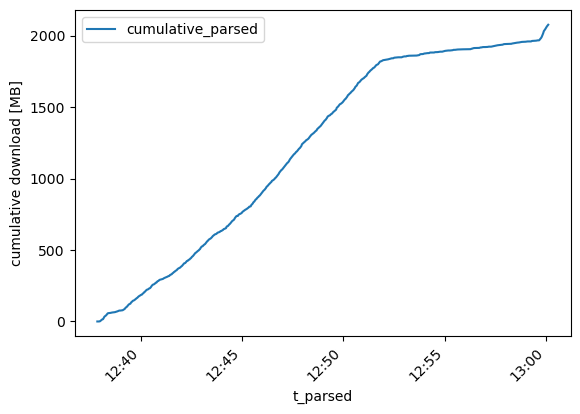

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

df.cumsum().reset_index().plot(x=time_column, y=network_usage_column, ax=ax)
dateformat = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(dateformat)
ax.set_ylabel("cumulative download [MB]")
fig.autofmt_xdate(rotation=45)

In [27]:
fig.savefig("minio_large.png")